In [2]:
import h5py
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from skimage.segmentation import find_boundaries
%matplotlib inline
%load_ext autoreload
%autoreload 2
from DeCRISP import DeCRISP as dcp

In [3]:
with open('./data/20210714masks_mem.npy', 'rb') as m:
    masks_mem = np.load(m)

In [13]:
df_cell_id = pd.read_csv("./result/crisprmap20210714sg2NEB_picklemax_cell_id_all.csv")
cell_id = np.array(df_cell_id.barcode).ravel()
df_cell_id.head()

,barcode,correlation_max,correlation_2nd_max,correlation_difference,select_by_correlation,spots_max,spots_sum,spots_needed,select_by_spots,selected
0,-1,0.000000,0.000000,0.000000,False,0.0,0.0,31395550336760,False,False
1,4,0.707106,0.707106,0.000000,False,1.0,1.0,13,False,False
2,4,0.812277,0.710742,0.101535,False,9.0,30.0,9,True,False
3,0,0.989949,0.565685,0.424264,True,4.0,7.0,4,True,True
4,6,0.987935,0.564535,0.423401,True,28.0,52.0,4,True,True


(-0.5, 1279.5, -0.5, 2047.5)

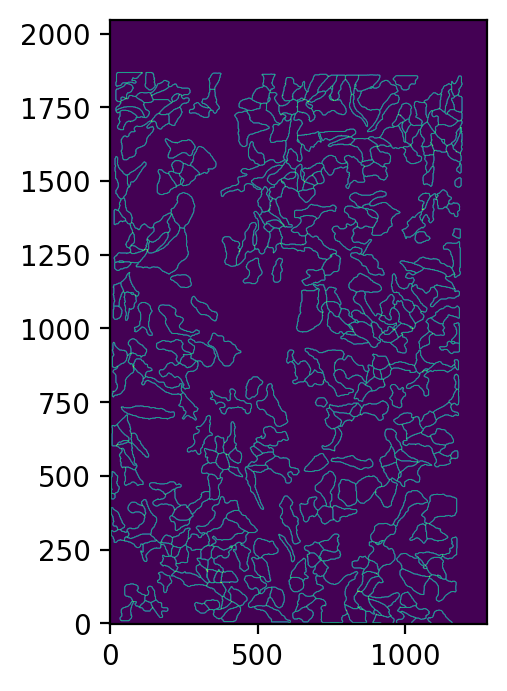

In [5]:
plt.figure(dpi=200)
plt.imshow(find_boundaries(masks_mem), origin='lower')
plt.axis('image')

## All asigned cells

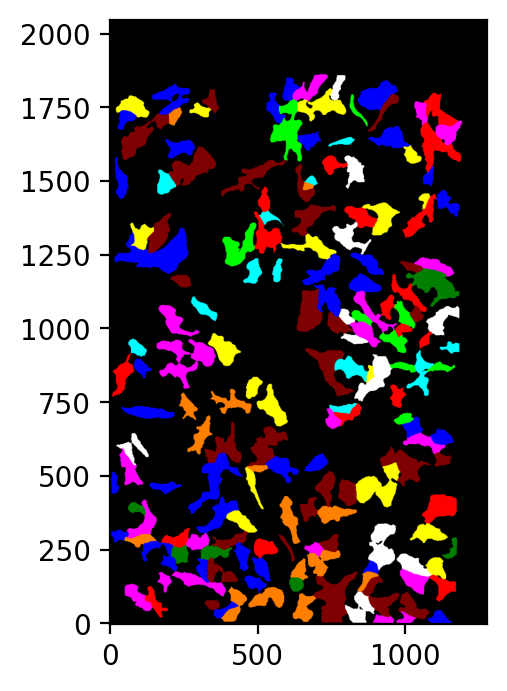

In [14]:
mask_color = dcp.mask_all(masks_mem, cell_id)
plt.figure(dpi=200)    
plt.imshow(mask_color.astype(np.uint8), origin='lower')

## Without double infected
nd

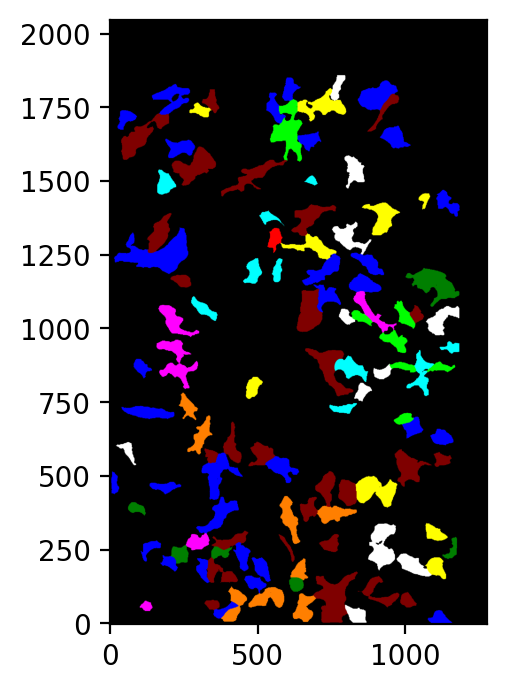

In [19]:
mask_color_nd = dcp.mask_select(masks_mem, df_cell_id, 'select_by_correlation')
plt.figure(dpi=200)
plt.imshow(mask_color_nd.astype(np.uint8), origin='lower')
# plt.title("Double infection removed")

## Without low number of spots
nl

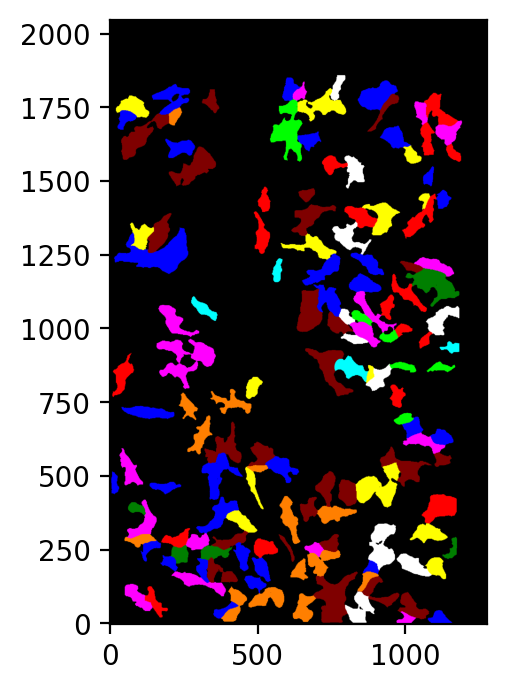

In [17]:
mask_color_nl = dcp.mask_select(masks_mem, df_cell_id, 'select_by_spots')
plt.figure(dpi=200)
plt.imshow(mask_color_nl.astype(np.uint8), origin='lower')
# plt.title('Cells with low number of spots removed')

## Finally selected
fs

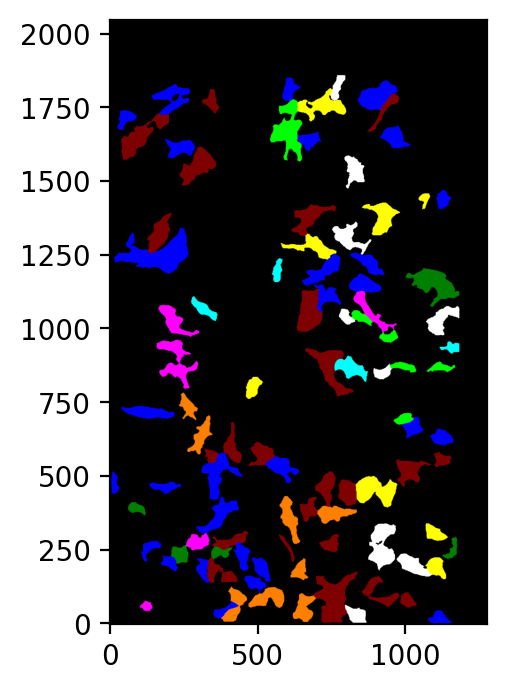

In [18]:
mask_color_fs = dcp.mask_select(masks_mem, df_cell_id, 'selected')
plt.figure(dpi=200)
plt.imshow(mask_color_fs.astype(np.uint8), origin='lower')
# plt.title('Selected cells')